In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [9]:
pd.read_csv('data/yolo_prediction/Side25_filled.csv')

,ID,Img_ID,Confidence,Format,x_center,y_center,width,height
0,326,326,0.000000,rgb,NaN,NaN,NaN,NaN
1,11490,1149,0.820656,rgb,0.833674,0.292546,0.332652,0.363080
2,11491,1149,0.783993,rgb,0.427915,0.290800,0.141526,0.132371
3,11492,1149,0.723120,rgb,0.321743,0.296943,0.120168,0.124422
4,11493,1149,0.494692,rgb,0.677872,0.310657,0.143841,0.215344
...,...,...,...,...,...,...,...,...
2655,579891,579891,0.000000,rgb,NaN,NaN,NaN,NaN
2656,580781,580781,0.000000,rgb,NaN,NaN,NaN,NaN
2657,5811830,581183,0.550398,rgb,0.543267,0.796533,0.397134,0.296426
2658,581278,581278,0.000000,rgb,NaN,NaN,NaN,NaN


In [10]:
df_names = ['Top25', 'Top50', 'Top75', 'Side25', 'Side50', 'Side75']
df_black = []
df_red = []
df_white = []

base = 'data/yolo_prediction/'
for name in df_names:
    df_black.append(pd.read_csv(base+name+'_filled.csv'))
    df_white.append(pd.read_csv(base+name+'_white.csv'))
    df_red.append(pd.read_csv(base+name+'_red.csv'))

In [11]:
merged_dfs = []
for i in range(len(df_black)):
    df_temp1 = df_black[i][['ID', 'Confidence']].rename({'Confidence': 'Conf_b'}, axis=1)
    df_temp2 = df_red[i][['ID', 'Confidence']].rename({'Confidence': 'Conf_r'}, axis=1)
    df_temp3 = df_white[i][['ID', 'Img_ID', 'Confidence']].rename({'Confidence': 'Conf_w'}, axis=1)
    df = pd.merge(df_temp1, df_temp2, on='ID', how='outer')
    df = pd.merge(df, df_temp3, on='ID', how='outer')
    df = df.fillna(0)
    df = df.loc[~((df['Conf_w'] == 0) & (df['Conf_b'] == 0) & (df['Conf_r'] == 0))]
    df = df.loc[~(df['Img_ID']==0)]
    merged_dfs.append(df)

In [12]:
def plot_comparisons(merged_dfs, df_names, title_plot):
    fig, axes = plt.subplots(6, 3, figsize=(16, 20))
    axes = axes.flatten()

    comparisons = [
        ("Black vs Red", "Conf_b", "Conf_r"),
        ("Red vs White", "Conf_r", "Conf_w"),
        ("Black vs White", "Conf_b", "Conf_w")
    ]

    for index, (df, name) in enumerate(zip(merged_dfs, df_names)):
        for j, (title, x_col, y_col) in enumerate(comparisons):
            ax = axes[index * 3 + j]
            
            # Scatter plot
            ax.scatter(df[x_col], df[y_col], alpha=0.7)
            
            # Add bisectrix (y = x)
            min_val = min(df[x_col].min(), df[y_col].min())
            max_val = max(df[x_col].max(), df[y_col].max())
            ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=1, label='y = x')
            
            # Set title and labels
            ax.set_title(f"{name} {title}", fontsize=10)
            ax.set_xlabel(x_col.split("_")[1].capitalize(), fontsize=8)
            ax.set_ylabel(y_col.split("_")[1].capitalize(), fontsize=8)
            ax.tick_params(axis='both', labelsize=7)
            
            ax.legend(fontsize=7)

    plt.subplots_adjust(wspace=0.4, hspace=0.6)
    plt.savefig(f"plots/colors/{title_plot}.png", format="png", dpi=300, bbox_inches="tight")


    plt.show()


In [13]:
def print_stats(merged_dfs, df_names):
    for df, name in zip(merged_dfs, df_names):
        print(name)
        print('Black: ', df['Conf_b'].mean())
        print('Red: ', df['Conf_r'].mean())
        print('White: ', df['Conf_w'].mean())
        print()

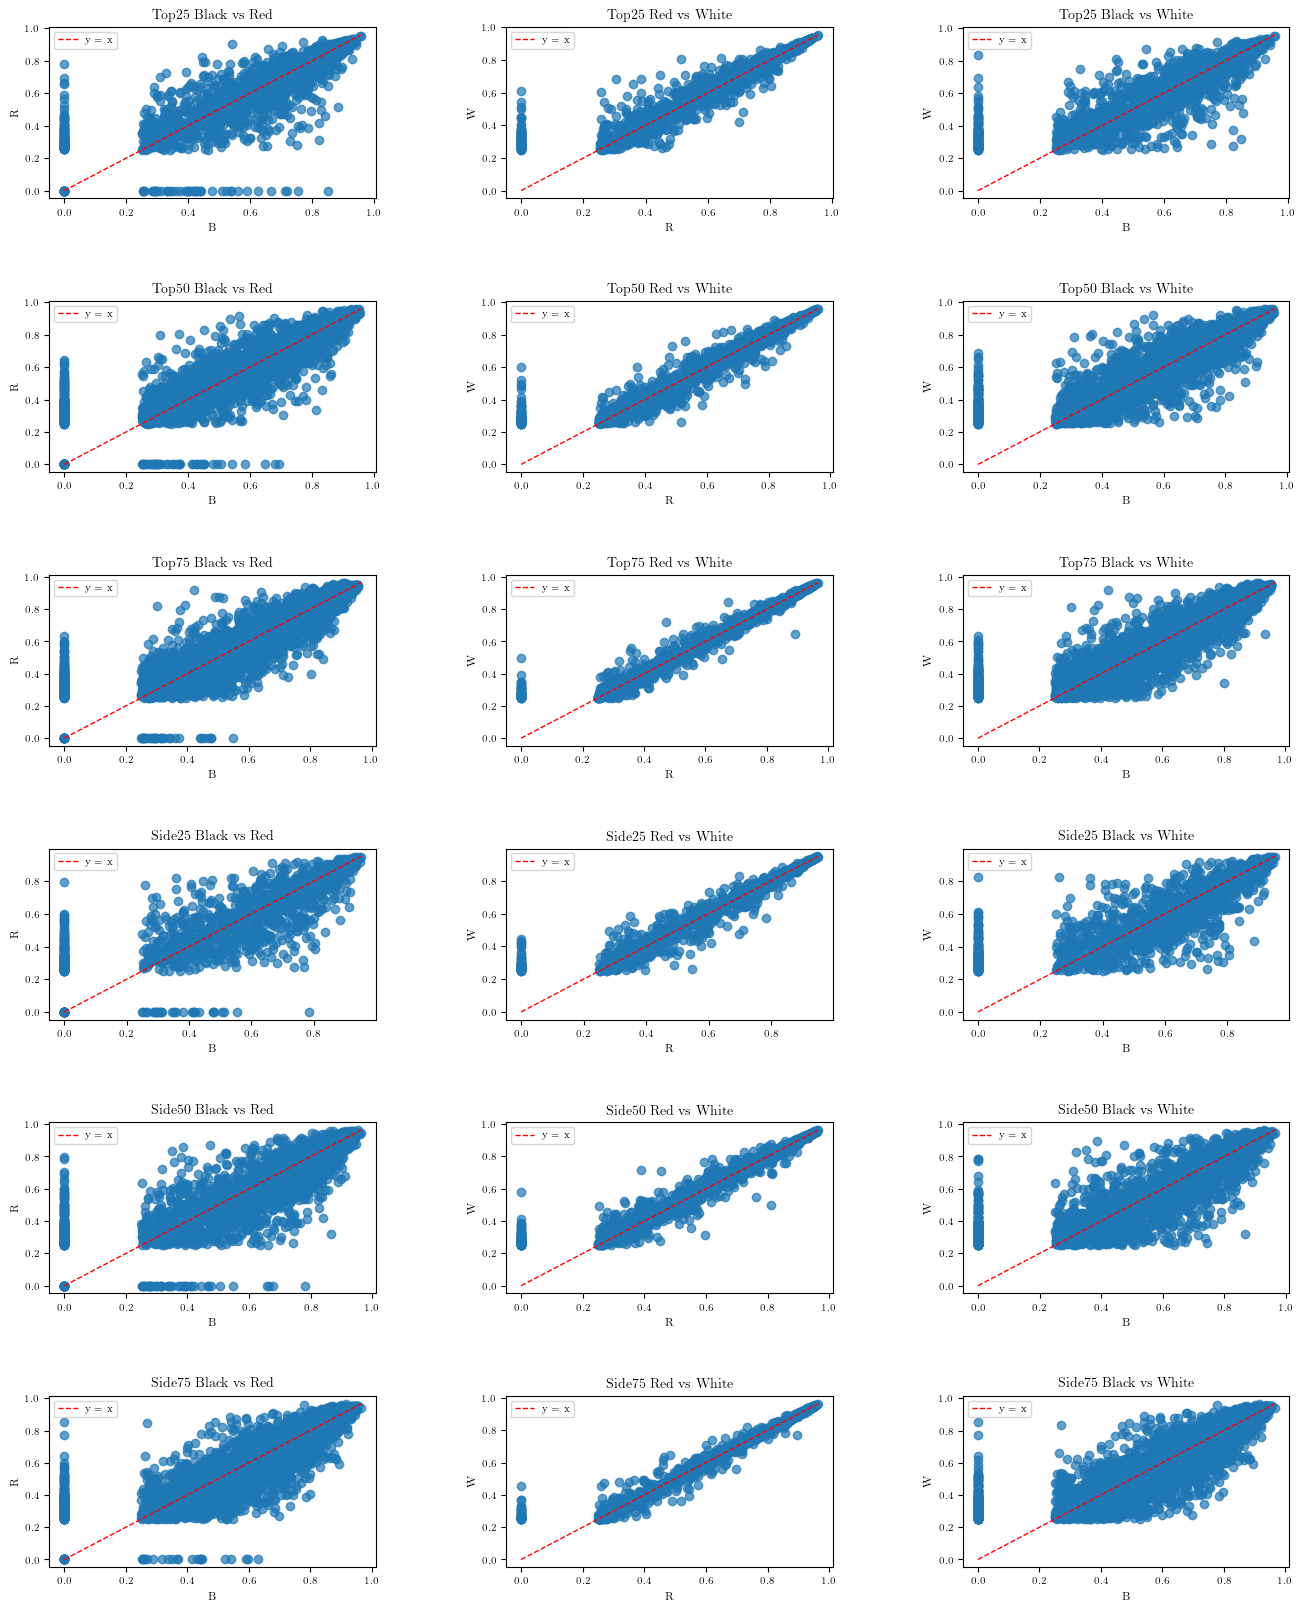

Top25
Black:  0.60537642749422
Red:  0.6111474703826416
White:  0.6310083019917905

Top50
Black:  0.6517697975907717
Red:  0.6673220175242096
White:  0.6736019933635959

Top75
Black:  0.6507491686666214
Red:  0.6643105574497362
White:  0.6683261840976426

Side25
Black:  0.5867341892947828
Red:  0.6058634759526802
White:  0.6167450140143994

Side50
Black:  0.6440589182425324
Red:  0.6496207012390774
White:  0.6584196786973011

Side75
Black:  0.6601805040185158
Red:  0.6673035282629488
White:  0.6704320505407352



In [14]:
plot_comparisons(merged_dfs, df_names, 'colors_comparisons')
print_stats(merged_dfs, df_names)